In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
salaries = pd.read_excel('C:/Users/alina/python_projects/task_analytics/data/salaries.xlsx')
inflation = pd.read_excel('C:/Users/alina/python_projects/task_analytics/data/inflation.xlsx', usecols=["Год", "Всего"])

In [29]:
salaries = salaries.rename(columns={"Unnamed: 0": "Sector"})
salaries_melted = salaries.melt(id_vars="Sector", var_name="Year", value_name="Salary")
salaries_melted["Year"] = salaries_melted["Year"].astype(int)

In [30]:
inflation = inflation.dropna(subset=["Всего"])
inflation["Год"] = inflation["Год"].astype(int)
inflation = inflation.set_index("Год").sort_index()

In [31]:
salaries_melted['Inflation'] = salaries_melted["Year"].map(inflation["Всего"])

In [32]:
base_year = 2024
years = sorted(inflation.index.unique())

# Множители инфляции для каждого года до base_year
inflation_multipliers = {
    year: np.prod([1 + inflation.loc[y, "Всего"]/100 for y in range(year+1, base_year+1) if y in inflation.index])
    for year in years
}

salaries_melted["InflationMultiplier"] = salaries_melted["Year"].map(inflation_multipliers)
salaries_melted["RealSalary"] = salaries_melted["Salary"] / salaries_melted["InflationMultiplier"]

# === РАСЧЁТ РАЗНИЦЫ ПО ГОДАМ ===
salaries_melted = salaries_melted.sort_values(["Sector", "Year"])
salaries_melted["RealSalaryChange_%"] = salaries_melted.groupby("Sector")["RealSalary"].pct_change() * 100

C:\Users\alina\AppData\Local\Temp\ipykernel_13708\898765921.py:15: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  salaries_melted["RealSalaryChange_%"] = salaries_melted.groupby("Sector")["RealSalary"].pct_change() * 100


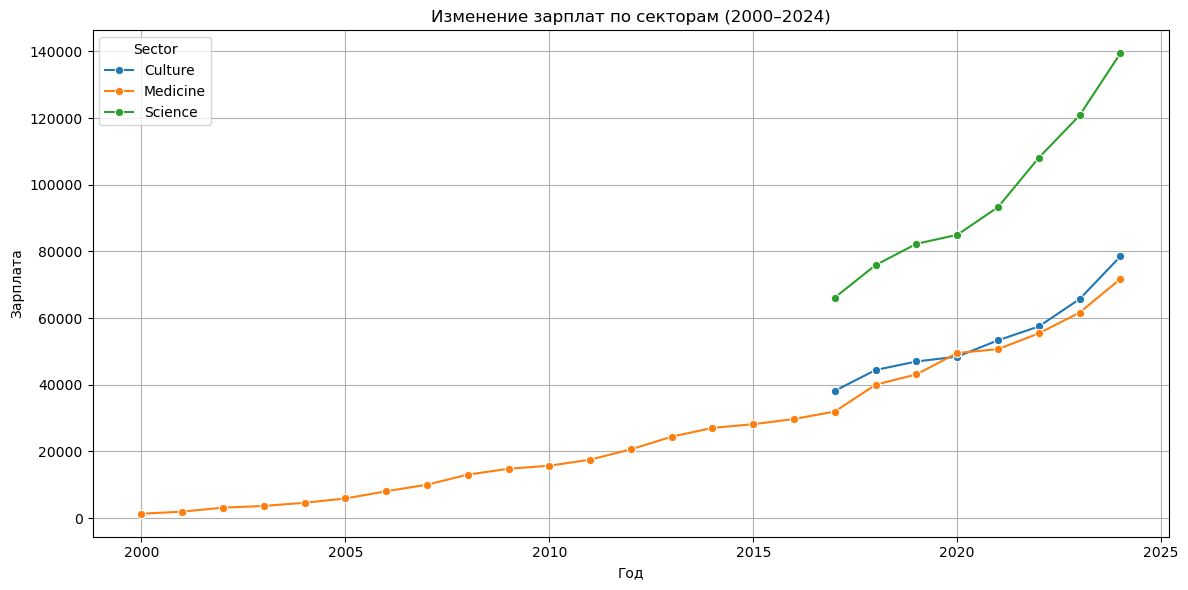

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=salaries_melted, x="Year", y="Salary", hue="Sector", marker="o")

plt.title("Изменение зарплат по секторам (2000–2024)")
plt.xlabel("Год")
plt.ylabel("Зарплата")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\alina\AppData\Local\Temp\ipykernel_13708\2240992379.py:6: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\alina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


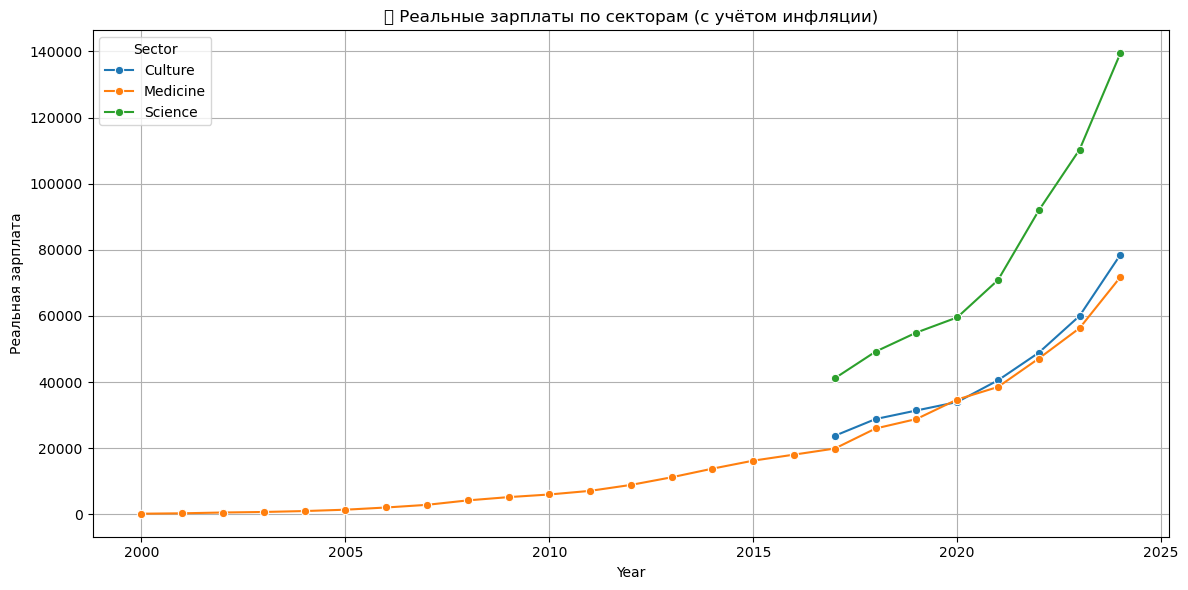

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=salaries_melted, x="Year", y="RealSalary", hue="Sector", marker="o")
plt.title("Реальные зарплаты по секторам (с учётом инфляции)")
plt.ylabel("Реальная зарплата")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\alina\AppData\Local\Temp\ipykernel_13708\2166860825.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\alina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


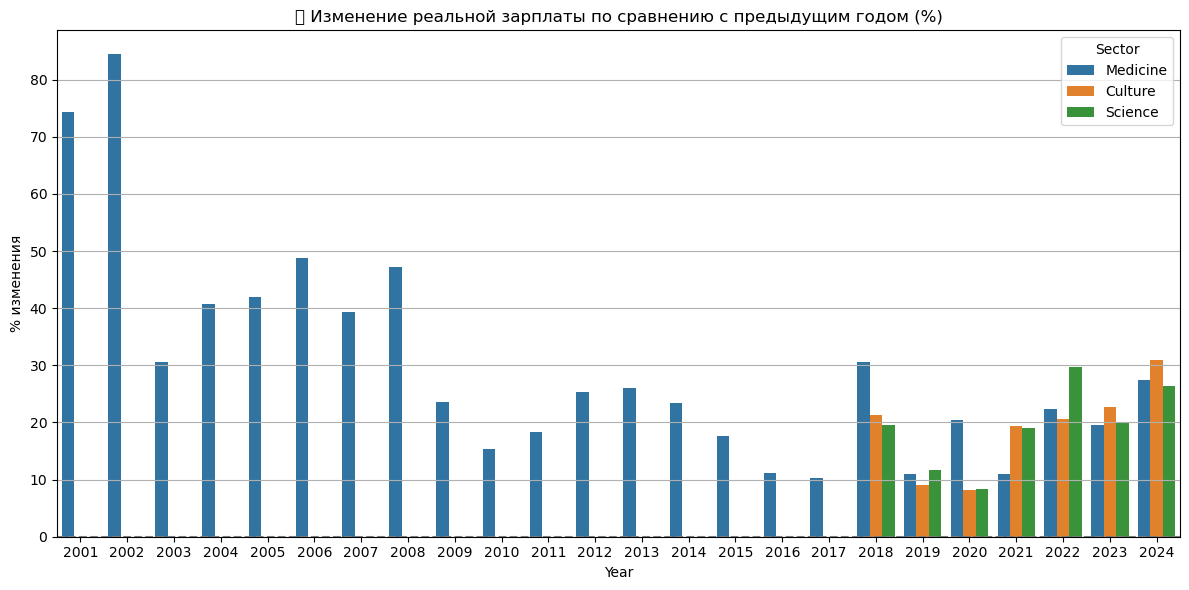

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=salaries_melted.dropna(), x="Year", y="RealSalaryChange_%", hue="Sector")
plt.title("Изменение реальной зарплаты по сравнению с предыдущим годом (%)")
plt.ylabel("% изменения")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()